In [84]:
! pip install --upgrade --force-reinstall pandas


  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl (11.6 MB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.1
    Uninstalling tzdata-2025.1:
      Successfully uninstalled tzdata-2025.1
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.9.0.post0
    Uninstalling python-dateutil-2.9.0.post0:
      Successfully uninstalled python-dat

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\manar\\anaconda3\\Lib\\site-packages\\~-mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [46]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
#Read in the csv file and convert to a Pandas dataframe
data = pd.read_csv("final_data.csv")

### Viewing the dataframe


In [6]:
data.head(10)  # Preview the first few rows

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,...,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,0
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,...,0.000000,0.000000,416,932,169,7,2000000,20000000,2,0
8,/teden-mengi/profil/spieler/548470,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
9,/luke-shaw/profil/spieler/183288,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,...,0.000000,0.000000,5854,443,70,4,35000000,42000000,2,1


In [7]:
data.tail(10)  # Preview the last few rows

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10744,/alessandro-lopane/profil/spieler/819840,Western Sydney Wanderers,Alessandro Lopane,midfield-AttackingMidfield,181.240353,19.0,32,0.070978,0.000000,0.212934,...,0.0,0.0,1268,0,0,0,125000,150000,3,0
10745,/brandon-borrello/profil/spieler/293592,Western Sydney Wanderers,Brandon Borrello,Attack-RightWinger,178.000000,27.0,45,0.359337,0.138206,0.248771,...,0.0,0.0,3256,400,61,1,700000,1200000,4,1
10746,/amor-layouni/profil/spieler/208880,Western Sydney Wanderers,Amor Layouni,Attack-RightWinger,191.000000,30.0,12,0.442804,0.332103,0.221402,...,0.0,0.0,813,69,11,0,500000,1000000,4,1
10747,/yeni-ngbakoto/profil/spieler/111053,Western Sydney Wanderers,Yeni N'Gbakoto,Attack-RightWinger,173.000000,31.0,35,0.291667,0.208333,0.125000,...,0.0,0.0,2160,0,0,0,500000,3000000,4,1
10748,/jarrod-carluccio/profil/spieler/749273,Western Sydney Wanderers,Jarrod Carluccio,Attack-RightWinger,178.000000,22.0,32,0.226700,0.000000,0.283375,...,0.0,0.0,1588,0,0,0,200000,200000,4,1
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.0,0.0,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.0,0.0,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.0,0.0,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.0,0.0,865,0,0,0,50000,50000,4,0
10753,/alexander-badolato/profil/spieler/957230,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.000000,18.0,21,0.000000,0.000000,0.086042,...,0.0,0.0,1046,0,0,0,25000,25000,4,0


In [8]:
data.shape

(10754, 22)

### Data Profiling


In [9]:
# Disblay all columns
data.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [10]:
# Disblay all information available
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [12]:
# Display summary statistics for categorical columns
data.describe(include="object")

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [17]:
# Value counts for key categorical features
data['player'].value_counts()

player
/david-de-gea/profil/spieler/59377             1
/bongokuhle-hlongwane/profil/spieler/669202    1
/joseph-rosales/profil/spieler/657225          1
/robin-lod/profil/spieler/173573               1
/emanuel-reynoso/profil/spieler/439626         1
                                              ..
/kayque/profil/spieler/813037                  1
/breno/profil/spieler/697400                   1
/patrick-de-paula/profil/spieler/737821        1
/gabriel-pires/profil/spieler/167291           1
/alexander-badolato/profil/spieler/957230      1
Name: count, Length: 10754, dtype: int64

In [15]:
data['team'].value_counts()

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

In [16]:
data['name'].value_counts()

name
Paulinho              6
Vitinho               5
Guilherme             5
Fernando              4
João Pedro            4
                     ..
Everson               1
Matheus Mendes        1
Gabriel Delfim        1
Nathan Silva          1
Alexander Badolato    1
Name: count, Length: 10584, dtype: int64

In [18]:
data['position'].value_counts()

position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64

In [13]:
# Display summary statistics for numerical columns
data.describe(include="number")

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [20]:
data['winger'].value_counts()

winger
0    7447
1    3307
Name: count, dtype: int64

In [22]:
data['position_encoded'].value_counts()

position_encoded
2    3528
3    3095
4    2902
1    1229
Name: count, dtype: int64

In [23]:
data['award'].value_counts()

award
0     4773
1     2211
2     1223
3      730
4      460
5      323
6      216
7      199
8      121
9      110
10      72
11      61
13      42
12      35
14      35
15      21
17      16
18      16
16      13
19      11
20      11
33       6
22       6
21       4
25       4
24       4
26       4
23       3
35       2
36       2
29       2
27       2
32       2
37       2
31       1
42       1
28       1
92       1
34       1
30       1
57       1
65       1
53       1
38       1
43       1
90       1
Name: count, dtype: int64

In [97]:
data['height'].value_counts()

height
180.000000    744
185.000000    608
175.000000    596
178.000000    594
183.000000    572
188.000000    493
184.000000    458
182.000000    449
181.240353    440
186.000000    423
187.000000    419
176.000000    390
177.000000    372
190.000000    371
173.000000    366
179.000000    359
181.000000    355
170.000000    312
191.000000    272
174.000000    270
189.000000    255
172.000000    254
192.000000    203
193.000000    181
171.000000    169
168.000000    124
194.000000    117
169.000000    107
195.000000     98
167.000000     85
196.000000     68
166.000000     44
165.000000     42
197.000000     31
198.000000     24
163.000000     16
160.000000     15
164.000000     14
199.000000     12
200.000000     12
202.000000      6
162.000000      6
161.000000      3
206.000000      2
204.000000      1
156.000000      1
159.000000      1
Name: count, dtype: int64

In [47]:
# Unique values per categorical column
categorical_columns = ['team', 'position', 'award']
unique_values = {col: data[col].nunique() for col in categorical_columns}
print("Unique values per categorical column:", unique_values)

Unique values per categorical column: {'team': 374, 'position': 16, 'award': 46}


### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
# The dataset is sourced from a credible football statistics database, ensuring accurate player values.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# Timeliness isn't crucial for this analysis -problem statement- and model building, so we go on continuing.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [27]:
# Checking if categorical data has inconsistencies in formatting.
print(data["team"].unique())


['Manchester United' 'West Ham United' 'Leicester City' 'Aston Villa'
 'Wolverhampton Wanderers' 'Southampton FC' 'Brighton &amp; Hove Albion'
 'Everton FC' 'Nottingham Forest' 'Leeds United' 'Crystal Palace'
 'Fulham FC' 'AFC Bournemouth' 'Brentford FC' 'Liverpool FC'
 'Newcastle United' 'Manchester City' 'Arsenal FC' 'Tottenham Hotspur'
 'Chelsea FC' 'Borussia Mönchengladbach' 'VfL Wolfsburg'
 'TSG 1899 Hoffenheim' '1.FC Union Berlin' 'FC Augsburg' 'VfB Stuttgart'
 '1.FSV Mainz 05' '1.FC Köln' 'Hertha BSC' 'FC Schalke 04' 'VfL Bochum'
 'SV Werder Bremen' 'Eintracht Frankfurt' 'SC Freiburg'
 'Borussia Dortmund' 'Bayer 04 Leverkusen' 'Bayern Munich' 'RB Leipzig'
 'Real Sociedad' 'Villarreal CF' 'Real Betis Balompié' 'Athletic Bilbao'
 'Valencia CF' 'Sevilla FC' 'Celta de Vigo' 'CA Osasuna' 'Girona FC'
 'Rayo Vallecano' 'RCD Mallorca' 'UD Almería' 'Real Valladolid CF'
 'Cádiz CF' 'Elche CF' 'RCD Espanyol Barcelona' 'Getafe CF'
 'Atlético de Madrid' 'Real Madrid' 'FC Barcelona' 'AS Roma'

In [29]:
data["team"] = data["team"].str.strip().str.title()  # Standardizing team names
print(data["team"].unique())

['Manchester United' 'West Ham United' 'Leicester City' 'Aston Villa'
 'Wolverhampton Wanderers' 'Southampton Fc' 'Brighton &Amp; Hove Albion'
 'Everton Fc' 'Nottingham Forest' 'Leeds United' 'Crystal Palace'
 'Fulham Fc' 'Afc Bournemouth' 'Brentford Fc' 'Liverpool Fc'
 'Newcastle United' 'Manchester City' 'Arsenal Fc' 'Tottenham Hotspur'
 'Chelsea Fc' 'Borussia Mönchengladbach' 'Vfl Wolfsburg'
 'Tsg 1899 Hoffenheim' '1.Fc Union Berlin' 'Fc Augsburg' 'Vfb Stuttgart'
 '1.Fsv Mainz 05' '1.Fc Köln' 'Hertha Bsc' 'Fc Schalke 04' 'Vfl Bochum'
 'Sv Werder Bremen' 'Eintracht Frankfurt' 'Sc Freiburg'
 'Borussia Dortmund' 'Bayer 04 Leverkusen' 'Bayern Munich' 'Rb Leipzig'
 'Real Sociedad' 'Villarreal Cf' 'Real Betis Balompié' 'Athletic Bilbao'
 'Valencia Cf' 'Sevilla Fc' 'Celta De Vigo' 'Ca Osasuna' 'Girona Fc'
 'Rayo Vallecano' 'Rcd Mallorca' 'Ud Almería' 'Real Valladolid Cf'
 'Cádiz Cf' 'Elche Cf' 'Rcd Espanyol Barcelona' 'Getafe Cf'
 'Atlético De Madrid' 'Real Madrid' 'Fc Barcelona' 'As Roma'

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [ ]:
# All the included variables align with the goal of analyzing player market values.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [31]:
# Checking for duplicate entries
data.duplicated().sum()

0

In [ ]:
# No duplicates rows to delete

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [ ]:
# Display number missing values 
print(data.isnull().sum())

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64


In [ ]:
# No nulls to go to clean 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [49]:
# Convert 'current_value' to numeric
data["current_value"] = pd.to_numeric(data["current_value"], errors="coerce")
print("Converted 'current_value' to numeric.")

Converted 'current_value' to numeric.


In [ ]:
# Using IQR Method to detect outliers
Q1 = data["current_value"].quantile(0.25)
Q3 = data["current_value"].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data["current_value"] < (Q1 - 1.5 * IQR)) | (data["current_value"] > (Q3 + 1.5 * IQR))]
print(outliers.shape)


Number of outliers in market value: 1260


In [25]:
# go to delete ouliers

In [ ]:
# Removing Outliers
data_cleaned = data[~((data["current_value"] < (Q1 - 1.5 * IQR)) | (data["current_value"] > (Q3 + 1.5 * IQR)))]
print(data_cleaned.shape)

Data after removing outliers:
(9494, 22)


## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [96]:
data.value_counts().sum()

10754

In [24]:
# Unique values per categorical column
categorical_columns = ['team', 'position', 'award']
unique_values = {col: data[col].nunique() for col in categorical_columns}
print("Unique values per categorical column:", unique_values)

Unique values per categorical column: {'team': 374, 'position': 16, 'award': 46}


In [80]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
# go back to 7th dimension Accuracy 

# Uni & multi variet analysis and outliers

In [ ]:
# Boxplot for Outliers in Market Value
plt.figure(figsize=(10, 5))
sns.boxplot(x=data["current_value"], color="red")
plt.title("Boxplot of Player Market Value")
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

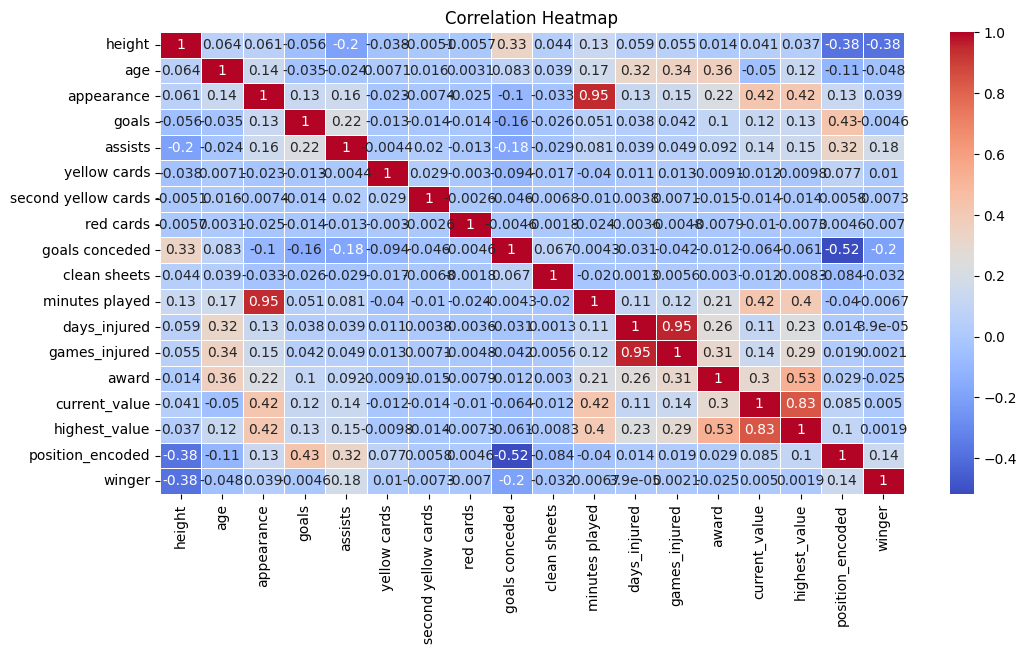

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

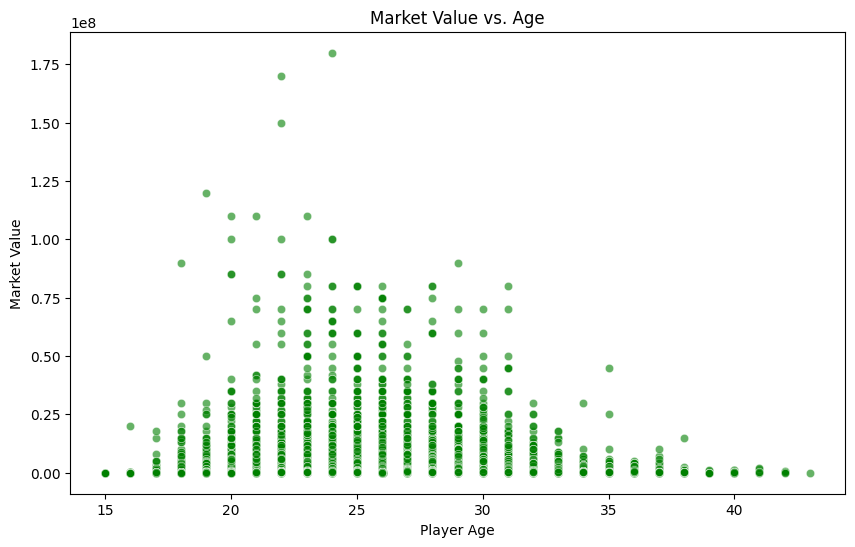

In [50]:
# Relationship Between Player Age & Market Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["age"], y=data["current_value"], alpha=0.6, color="green")
plt.title("Market Value vs. Age")
plt.xlabel("Player Age")
plt.ylabel("Market Value")
plt.show()

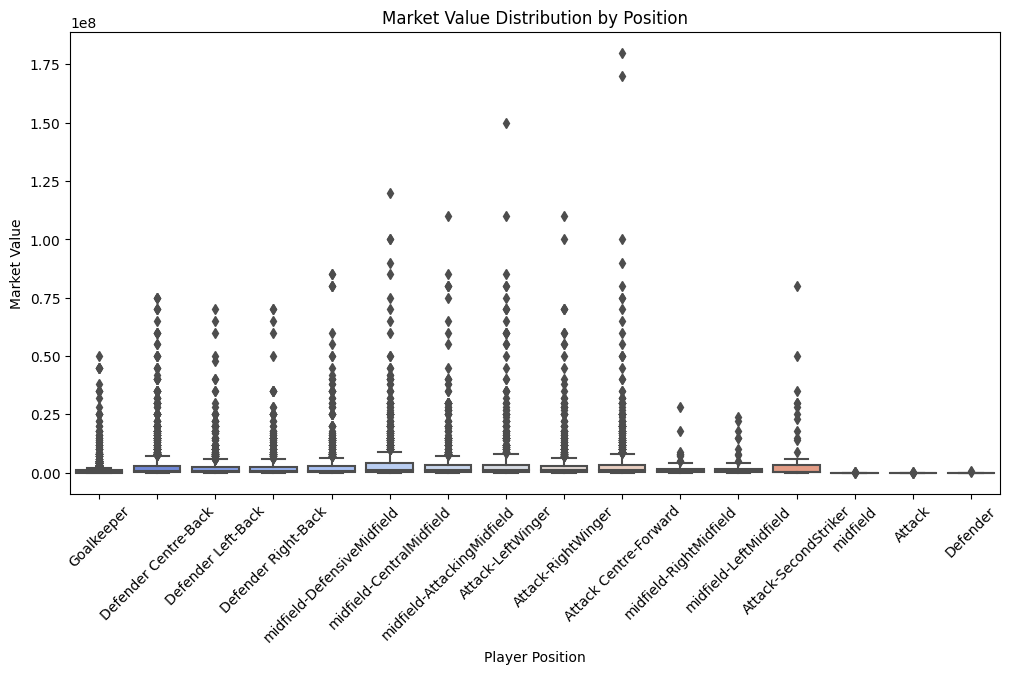

In [ ]:
# Market Value by Position
plt.figure(figsize=(12, 6))
sns.boxplot(x=data["position"], y=data["current_value"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Market Value Distribution by Position")
plt.xlabel("Player Position")
plt.ylabel("Market Value")
plt.show()

### 6. Outlier Detection and Handling

In [91]:
# Using IQR Method to detect outliers
Q1 = data["current_value"].quantile(0.25)
Q3 = data["current_value"].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data["current_value"] < (Q1 - 1.5 * IQR)) | (data["current_value"] > (Q3 + 1.5 * IQR))]
print(outliers.shape)

(1260, 22)


In [92]:
data.shape

(10754, 22)

In [52]:
# Removing Outliers
data_cleaned = data[~((data["current_value"] < (Q1 - 1.5 * IQR)) | (data["current_value"] > (Q3 + 1.5 * IQR)))]
print(data_cleaned.shape)

(9494, 22)


## Driving some meaningful insights


In [ ]:
# 1. Teams that have the highest-valued players
top_teams = data.groupby("team")["current_value"].mean().sort_values(ascending=False).head(10)
print(top_teams)

team
Manchester City        4.380208e+07
Arsenal Fc             3.869565e+07
Fc Barcelona           3.631818e+07
Bayern Munich          3.628519e+07
Real Madrid            3.627083e+07
Paris Saint-Germain    3.268704e+07
Chelsea Fc             3.173438e+07
Liverpool Fc           2.930000e+07
Tottenham Hotspur      2.721200e+07
Manchester United      2.486562e+07
Name: current_value, dtype: float64


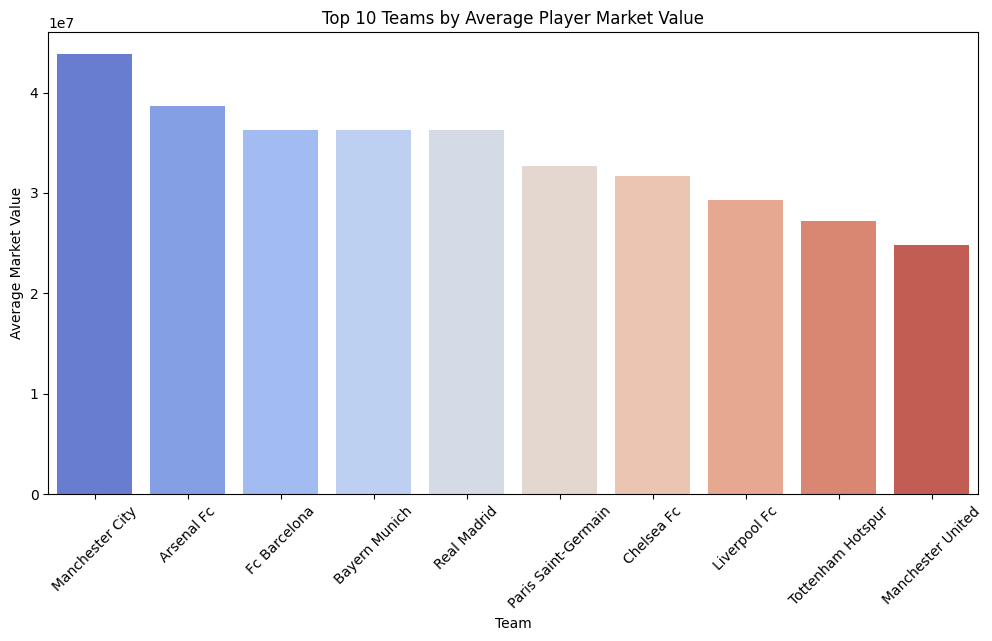

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_teams.index, y=top_teams.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Teams by Average Player Market Value")
plt.xlabel("Team")
plt.ylabel("Average Market Value")
plt.show()

In [42]:
# 2. player positions with the highest market value
position_values = data.groupby("position")["current_value"].mean().sort_values(ascending=False)
print(position_values)

position
Attack-SecondStriker          6.283615e+06
Attack-LeftWinger             5.287990e+06
midfield-CentralMidfield      4.592298e+06
midfield-AttackingMidfield    4.481125e+06
Attack-RightWinger            4.180823e+06
Attack Centre-Forward         4.102439e+06
midfield-DefensiveMidfield    3.845194e+06
Defender Centre-Back          3.610379e+06
Defender Left-Back            3.061958e+06
Defender Right-Back           2.985006e+06
midfield-LeftMidfield         2.041000e+06
midfield-RightMidfield        1.686275e+06
Goalkeeper                    1.650801e+06
Defender                      5.757576e+04
midfield                      4.466667e+04
Attack                        4.198113e+04
Name: current_value, dtype: float64


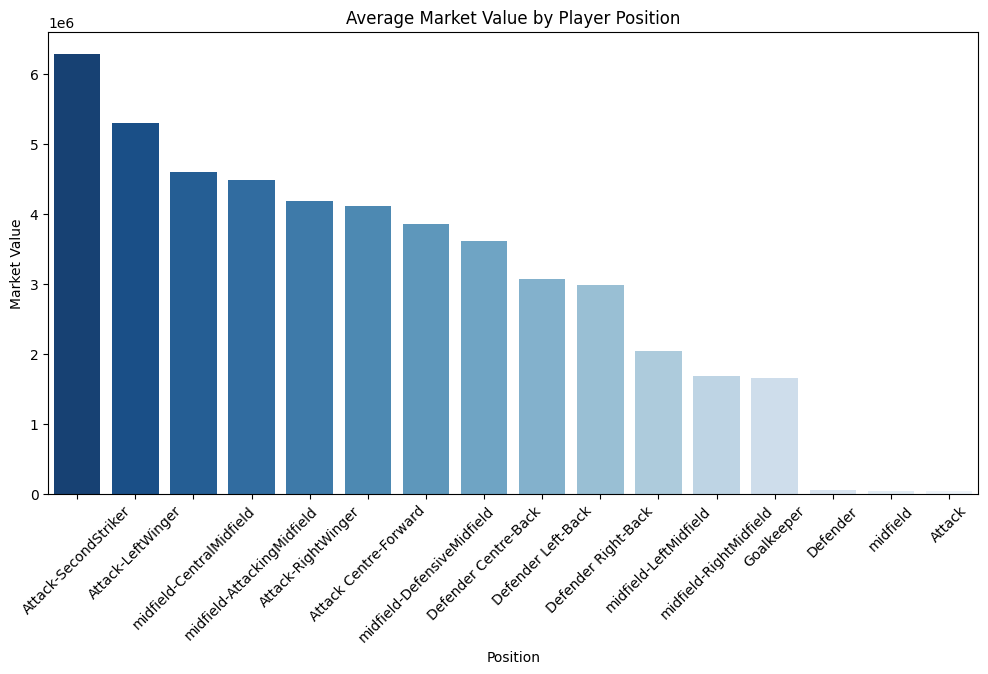

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x=position_values.index, y=position_values.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Average Market Value by Player Position")
plt.xlabel("Position")
plt.ylabel("Market Value")
plt.show()

In [44]:
# 3. The relationship between player age and market value
correlation = data["age"].corr(data["current_value"])
print(f"\nCorrelation between player age and market value: {correlation:.2f}")


Correlation between player age and market value: -0.05


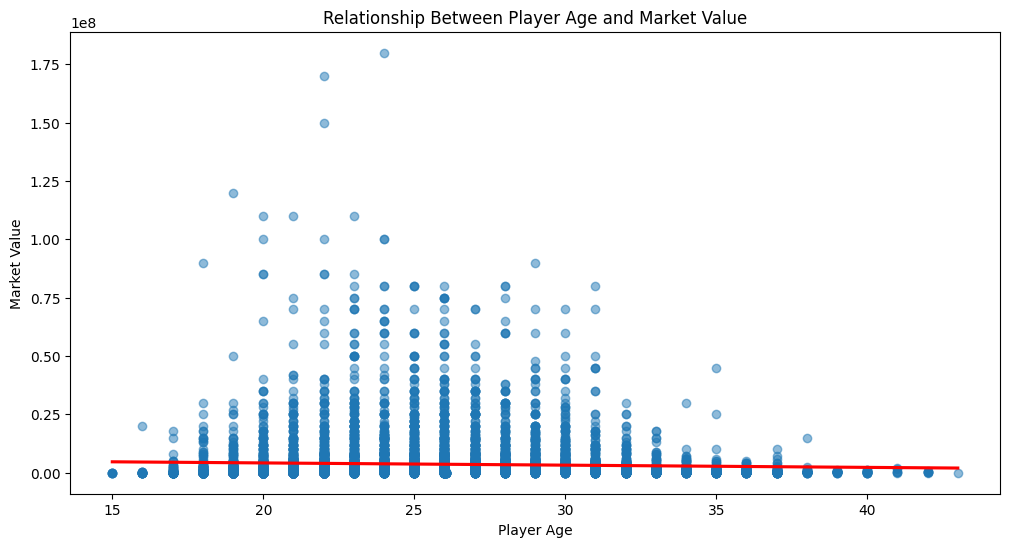

In [45]:
plt.figure(figsize=(12, 6))
sns.regplot(x=data["age"], y=data["current_value"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Relationship Between Player Age and Market Value")
plt.xlabel("Player Age")
plt.ylabel("Market Value")
plt.show()


### Feature Engineering

In [90]:
data.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow_cards', 'second_yellow_cards', 'red_cards',
       'goals_conceded', 'clean_sheets', 'minutes_played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [ ]:
# Identify categorical and numerical features to train
categorical_features = ['team', 'position', 'award']
numerical_features = ['age', 'games_played', 'goals', 'assists', 'minutes_played']

In [57]:
# Encoding categorical variables and scaling numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

### Model Training

In [59]:
print(data.columns)

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')


In [60]:
data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
print(data.columns)  # Check if column names correctly formatted

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow_cards', 'second_yellow_cards', 'red_cards',
       'goals_conceded', 'clean_sheets', 'minutes_played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')


In [ ]:
# Define Features & Target Variable
numerical_features = ["minutes_played", "age", "goals", "assists", "height"]


In [ ]:
categorical_features = ["position", "team", "award"]

### Define Features & Target Variable

In [65]:
X = data[numerical_features + categorical_features]  # Features
y = data["current_value"]  # Target variable

### Splitting Data into Training & Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Preprocessing Pipeline

In [67]:
# Data Preprocessing Pipeline
# Scaling numerical features
num_transformer = StandardScaler()

In [68]:
# Encoding categorical features
cat_transformer = OneHotEncoder(handle_unknown="ignore")

In [69]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ("num", num_transformer, numerical_features),
    ("cat", cat_transformer, categorical_features)
])

In [70]:
# Define the Model
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

### Model Training


In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['minutes_played', 'age',
                                                   'goals', 'assists',
                                                   'height']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['position', 'team',
                                                   'award'])])),
                ('regressor', LinearRegression())])

### Model Evaluation on Test Set


In [ ]:
y_pred = model.predict(X_test)

In [73]:
# Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [74]:
# Print Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 3153565.44
Root Mean Squared Error (RMSE): 6629844.15
R-Squared (R²): 0.51


### Model Evaluation Visualizations


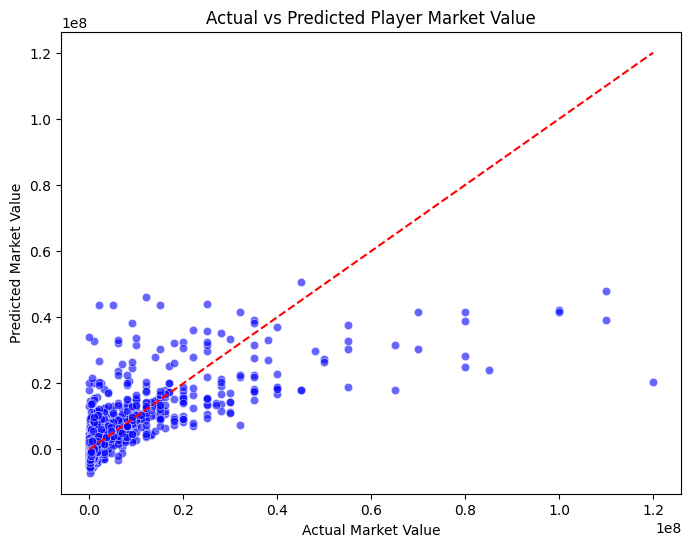

In [75]:
# Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Ideal Fit Line
plt.title("Actual vs Predicted Player Market Value")
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.show()

C:\Users\manar\AppData\Local\Temp\ipykernel_26940\2009990540.py:4: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option("all")
C:\Users\manar\AppData\Local\Temp\ipykernel_26940\2009990540.py:4: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option("all")


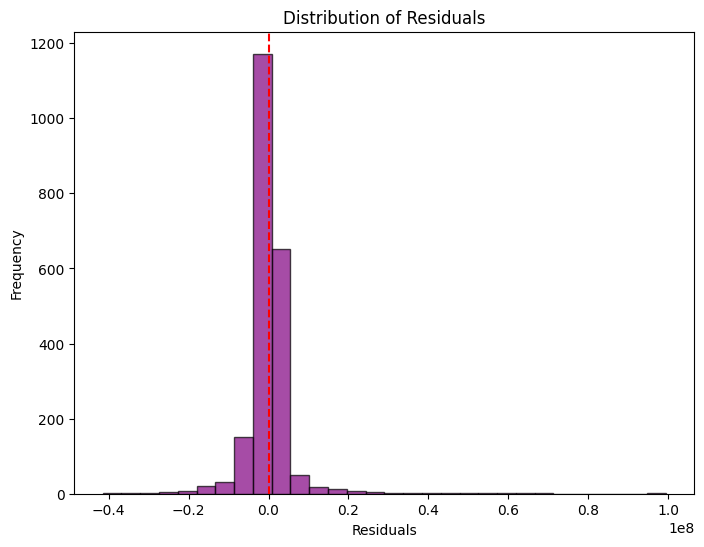

In [89]:
# Residual Plot

# Reset Pandas settings to avoid configuration errors
pd.reset_option("all")

# Compute residuals
residuals = y_test - y_pred

# Remove invalid values
residuals = residuals[np.isfinite(residuals)]  # Removes NaN and Inf values

# Plot Residual Distribution
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color="purple", edgecolor="black", alpha=0.7)
plt.axvline(x=0, color="red", linestyle="--")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()